In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args) == 3:
        fig_ax.legend(loc=args[2])

def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')
    
    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

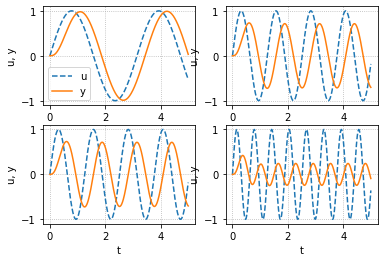

In [3]:
fig, ax = plt.subplots(2, 2)
zeta = 0.7
omega_n = 5
P = ct.tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])

freq = [2, 5, 10, 20]
Td = np.arange(0, 5, 0.01)
for i in range(2):
    for j in range(2):
        u = np.sin(freq[i+j]*Td)
        t, y, x0 = ct.forced_response(P, Td, u, 0)
        
        ax[i, j].plot(t, u, ls='--', label='u')
        ax[i, j].plot(t, y, label='y')
        plot_set(ax[i, j], 't', 'u, y')
ax[0, 0].legend()

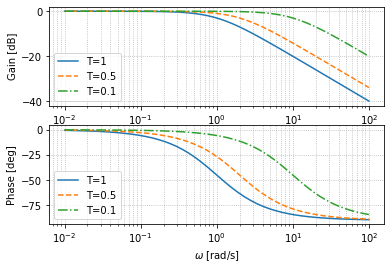

In [10]:
K = 1
T = [1, 0.5, 0.1]

LS = linestyle_generator()
fig, ax = plt.subplots(2, 1)
for i in range(len(T)):
    P = ct.tf([0, K], [T[i], 1])
    gain, phase, w  = ct.bode_plot(P, np.logspace(-2, 2), Plot=False)
    pltargs = {'ls': next(LS), 'label': 'T='+str(T[i])}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)

bodeplot_set(ax, 3, 3)

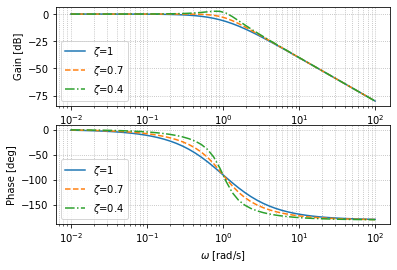

In [11]:
zeta = [1, 0.7, 0.4]
omega_n = 1

LS = linestyle_generator()
fig, ax = plt.subplots(2, 1)
for i in range(len(zeta)):
    P = ct.tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    gain, phase, w = ct.bode_plot(P, np.logspace(-2, 2), Plot=False)
    
    pltargs = {'ls': next(LS), 'label': '$\zeta$='+str(zeta[i])}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)

bodeplot_set(ax, 3, 3)

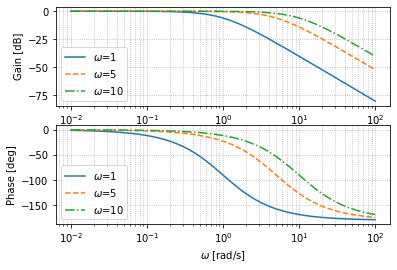

In [13]:
zeta = 1
omega_n = [1, 5, 10]

LS = linestyle_generator()
fig, ax = plt.subplots(2, 1)
for i in range(len(omega_n)):
    P = ct.tf([0, omega_n[i]**2], [1, 2*zeta*omega_n[i], omega_n[i]**2])
    gain, phase, w = ct.bode_plot(P, np.logspace(-2, 2), Plot=False)
    
    pltargs = {'ls': next(LS), 'label': '$\omega$='+str(omega_n[i])}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)
bodeplot_set(ax, 3, 3)